In [1]:
#Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns
sns.set()

In [2]:
#Reading the DataSet
data = pd.read_csv("E:\Python All in One\DATA_SETS\Machine Learning A-Z Template Folder\Part 3 - Classification\Section 15 - K-Nearest Neighbors (K-NN)\K_Nearest_Neighbors\Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
#Selecting Dependent and Independent Variables
x = data.iloc[:, 2:4].values
y = data.iloc[:, 4].values

In [5]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [6]:
#Separating the Training Set and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [8]:
#Building our model
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
#Predicting our Variables
y_pred = classifier.predict(x_test)

In [23]:
#Comparing our predicting values and test values
df1 = pd.DataFrame(y_test, y_pred).reset_index()
df1 = df1.rename(columns = {'index' : 'Y_Test', 0:'Y_Predicted'})

df1

,Y_Test,Y_Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,1
96,0,0
97,1,1
98,1,1


In [36]:
#Checking at which index number both the data frame produced unequal results
count_value = np.where(df1['Y_Test'] !=df1['Y_Predicted'])

In [38]:
#Evaluating our model
score = classifier.score(x_test, y_test)*100
print(score)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

90.0
[[65  3]
 [ 7 25]]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


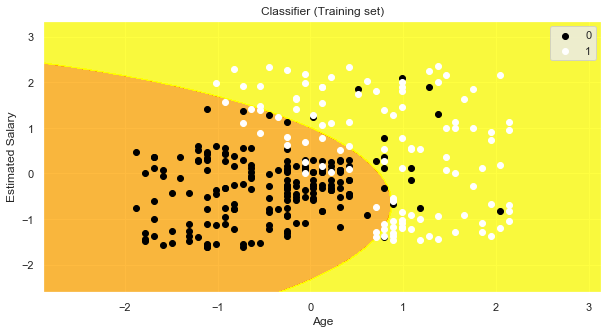

In [41]:
#Visualizing our Training Set

from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1, step = 0.01), 
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1, step = 0.01)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('orange', 'yellow')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Classifier (Training set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


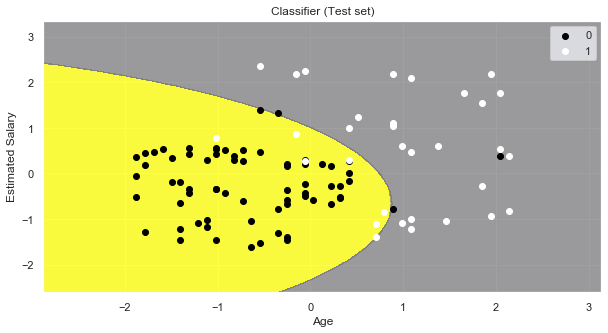

In [40]:
#Visualizing our Test Set
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x[:,0].min()-1, stop = x[:, 0].max()+1, step = 0.01), 
                     np.arange(start = x[:,1].min()-1, stop = x[:, 1].max()+1, step = 0.01)
                    
                    )
pt.figure(figsize = (10,5))
pt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('yellow', 'Grey')))
pt.xlim(x1.min(), x1.max())
pt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    pt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
pt.title('Classifier (Test set)')
pt.xlabel('Age')
pt.ylabel('Estimated Salary')
pt.legend()
pt.show()